# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
##### !. VScode 플랫폼을 사용하여 가상환경 Python 3.9.7버전에서 작성되었습니다.


### (1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.  
(이 코드에서는 데이터 관리를 용이하게 하기 위해 직접 다운로드)

In [42]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv("/Users/hpcd/Desktop/Code/LMS/[E-02]회귀,분류/train.csv")

In [19]:
# 데이터 구성 확인
train.head(5) #여기서 사용할 데이터는 datetime으로 2011-01-01 00:00:00 형태로 되어 있음.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
# 속성확인
train.dtypes # datetime의 속성이 object임을 확인

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime  
pandas datetime extract year month day 키워드로 검색해 보기

In [14]:
#datetime 컬럼을 datetime 자료형으로 전환. pd.to_datetime() 
train['datetime'] = pd.to_datetime(train['datetime'])

In [23]:
train.dtypes #datatime의 속성이 object -> datetiem64[ns]로 변경된 것을 확인할 수 있음.

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [28]:
#datetime 자료형에서 시간 정보 추출. dt 속성
train['datetime'].dt.year
train['datetime'].dt.month
train['datetime'].dt.day
train['datetime'].dt.hour
train['datetime'].dt.minute
train['datetime'].dt.second
#출력은 맨밑줄인 second만 출력



0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [36]:
train['year'] = train['datetime'].dt.year # train에 year 추가
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# 내용업데이트(입력데이터를 바꾼다거나 하는등 )는 컬럼명이 같다면 업데이트됨
# 삭제는 train.drop(데이터명, axis=0) 명령어를 사용 axis=0(index), 1(column) 명령어를 사용


In [37]:
train.head(5) #컬럼 6개가 추가된 것을 확인할 수 있음.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기  
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [66]:
data_num = len(train)

10886

NameError: name 'data_num' is not defined

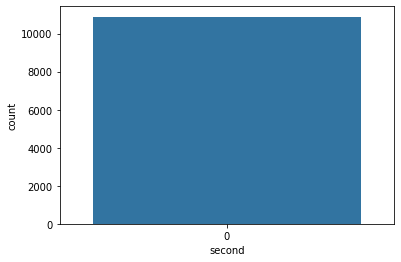

In [68]:
#sns.countplot(x = 'data = train('year', 'month', 'day', 'hour', 'minute', 'second'))
#sns.countplot(x = 'year', hue = 'month', data=train)
a = sns.countplot(data = train, x = "year")
b = sns.countplot(data = train, x = "month")
c = sns.countplot(data = train, x = "day")
d = sns.countplot(data = train, x = "hour")
e = sns.countplot(data = train, x = "minute")
f = sns.countplot(data = train, x = "second")
sns.countplot(data_num)

plt.show(a)


### (4) X, y 컬럼 선택 및 train/test 데이터 분리
X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기  
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


### (5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기  

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기  
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기  
mse 값과 함께 rmse 값도 계산하기  

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기  
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기  